Airbnb is an American San Francisco-based company operating an online marketplace for short-term homestays and experiences. It started at 2008 and nowdays shares a non ignorable percentage of the respective market worldwide. More and more people provide a flat or house to the platform. It is a sustainable source of money. 
 
The dataset has been taken by kaggle and from the link below I only take weekdays file:

https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe?select=london_weekdays.csv

Original Datasets can also be found: https://zenodo.org/record/4446043#.Y9Y7ZtJBwUE

Kristóf Gyódi and Łukasz Nawaro have published their work, https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#fig1. Of course, it can be cited in case that you are writing an article!

Question which have to be addressed is to forecast the price. Analyzing previous data about Airbnb listings could help to predict potential rental prices in the future.

The notebook includes:
- Data Cleaning
- (Exploratory and Statistical) Data analysis and correlations
- Price forecasting
- Areas determination where airbnbs will be most profitable

Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Read the dataset

In [2]:
data = pd.read_csv("Amsterdam.csv")
data.head(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


### Dataset columns

In [3]:
data.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

Before I go on, let's see what is the meaning of each column:

- **Unnamed: 0** : it is like the index of the dataset
- **realSum**: The total price of the Airbnb listing
- **roomtype**: The type of room offered (e.g. private room, shared room, entire home/apt). 
- **room_shared**: Whether the room is shared or not. 
- **room_private**: Whether the room is private or not.
- **person_capacity**: The maximum number of people that can be accommodated in a single listing.
- **host_is_superhost**: Whether or not a particular host is identified as a superhost on Airbnb. 
- **multi**: Whether multiple rooms are provided in one individual listing or not. 
- **biz**: Whether a particular listing offers business facilities like meeting area/conference rooms in addition to 
- **cleanless_rating**: The rating associated with how clean an individual property was after guests stayed at it. 
- **guest_satisfaction_overall**: The rating associated with how clean an individual property was after guests stayed at it.
- **dist**: The total quantity of bedrooms available among all properties against a single hosting id.
- **metro_dist**: Distance from metro station associated with every rental property.
- **attr_index**: attraction index
- **attr_index_norm**: attraction index, normalized
- **rest_index**: restaurant index
- **rest_index_norm**: restaurant index, normalized
- **lng** Longitude measurement corresponding to each rental unit. 
- **lat**: Latitude measurement corresponding to each rental unit.

### Basic data information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

We can see that there are no nan values and the data type of the features. 

# Data Cleaning

The data cleaning part is very important before applying statistical analysis or exploratory data analysis or data preprocessing. I already know what is the data type and how many values are missing. No value is missing. But we can visualize it with an easy way. I will use the heatmap command from seaborn.

<AxesSubplot:>

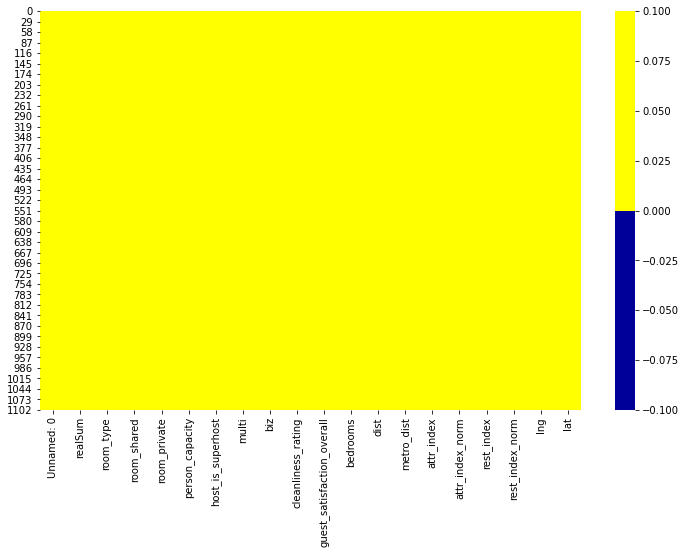

In [5]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

fig, ax = plt.subplots(1,1,figsize=(14,10))
fig.tight_layout(pad=15.0)

cols_x = data.columns
cols_y = data.columns
sns.heatmap(data[cols_x].isnull(), ax=ax, cmap=sns.color_palette(colours))

### Drop of some columns

In this early stage, I can check out if there are columns that include similar information or are meaningless to have them. Before I check for duplicated, I will drop off the column "Unnamed: 0". 

For example, the column "Unnamed: 0" is meaningless to have it. It is like the index of the dataset. Thus, I drop it off.

In [6]:
data=data.drop("Unnamed: 0", axis=1)
data.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508


There are columns which might include similar information...For example:
- attr_index and attr_index_norm
- rest_index and rest_index_norm

Let's see with boxplots the range of values in each paired.

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

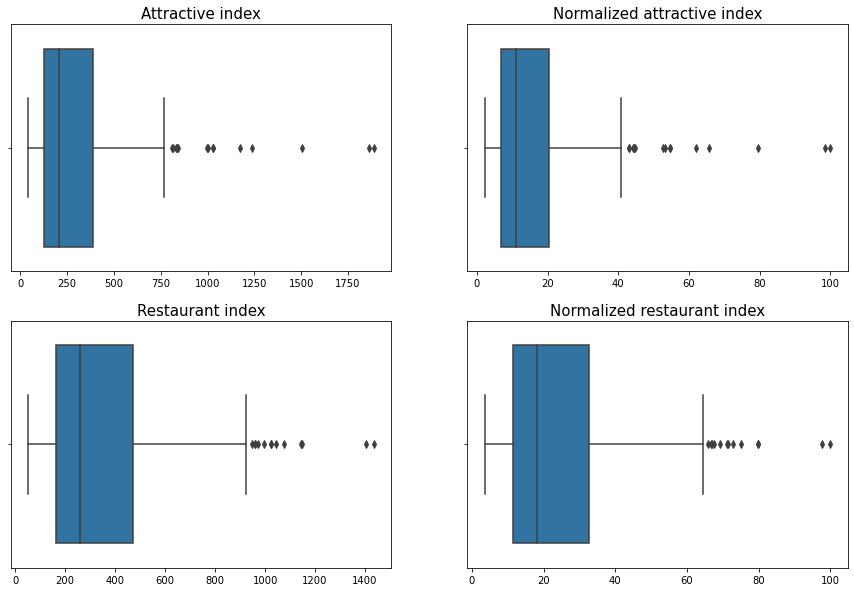

In [7]:
fig, ax = plt.subplots(2,2,figsize=(15,10))

sns.boxplot(data["attr_index"], ax=ax[0,0])
sns.boxplot(data["attr_index_norm"], ax=ax[0,1])
ax[0,0].set_xlabel("")
ax[0,1].set_xlabel("")
ax[0,0].set_title("Attractive index", fontsize=15)
ax[0,1].set_title("Normalized attractive index", fontsize=15)



sns.boxplot(data["rest_index"], ax=ax[1,0])
sns.boxplot(data["rest_index_norm"], ax=ax[1,1])
ax[1,0].set_xlabel("")
ax[1,1].set_xlabel("")
ax[1,0].set_title("Restaurant index", fontsize=15)
ax[1,1].set_title("Normalized restaurant index", fontsize=15);

Another way to see min, max and percentiles is the descriptive analysis that pandas provides.

In [8]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1103.000000,1103.000000,1103.00000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000,1103.000000
mean,545.020526,2.792384,0.30825,0.115141,9.461469,94.362647,1.282865,2.841621,1.089439,271.009899,14.350154,341.541187,23.799081,4.891158,52.364858
std,416.974314,1.044151,0.46198,0.319336,0.798201,6.089691,0.740178,2.123245,0.836546,197.046890,10.433764,236.611077,16.487400,0.038882,0.019467
min,128.887118,2.000000,0.00000,0.000000,4.000000,20.000000,0.000000,0.015059,0.036530,40.931415,2.167346,50.877318,3.545205,4.775500,52.291100
25%,309.797764,2.000000,0.00000,0.000000,9.000000,92.000000,1.000000,1.302058,0.462983,127.909866,6.772912,163.469245,11.390772,4.871000,52.354580
50%,430.248635,2.000000,0.00000,0.000000,10.000000,96.000000,1.000000,2.341366,0.856010,208.180311,11.023286,260.257028,18.135084,4.890010,52.365590
75%,657.324303,4.000000,1.00000,0.000000,10.000000,98.000000,2.000000,3.648138,1.510629,386.442241,20.462373,469.290623,32.700846,4.907315,52.375260
max,7782.907225,6.000000,1.00000,1.000000,10.000000,100.000000,5.000000,11.187100,4.411915,1888.550428,100.000000,1435.102401,100.000000,5.010770,52.423480


For the specific features:

In [9]:
data.describe()[["attr_index","attr_index_norm","rest_index","rest_index_norm"]]

,attr_index,attr_index_norm,rest_index,rest_index_norm
count,1103.000000,1103.000000,1103.000000,1103.000000
mean,271.009899,14.350154,341.541187,23.799081
std,197.046890,10.433764,236.611077,16.487400
min,40.931415,2.167346,50.877318,3.545205
25%,127.909866,6.772912,163.469245,11.390772
50%,208.180311,11.023286,260.257028,18.135084
75%,386.442241,20.462373,469.290623,32.700846
max,1888.550428,100.000000,1435.102401,100.000000


I have to keep one columns from each of the paired. Thus, I keep the normalized one:

In [10]:
data = data.drop(["attr_index","rest_index"], axis=1)
data.head(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508


Let's see what is included in the room_type

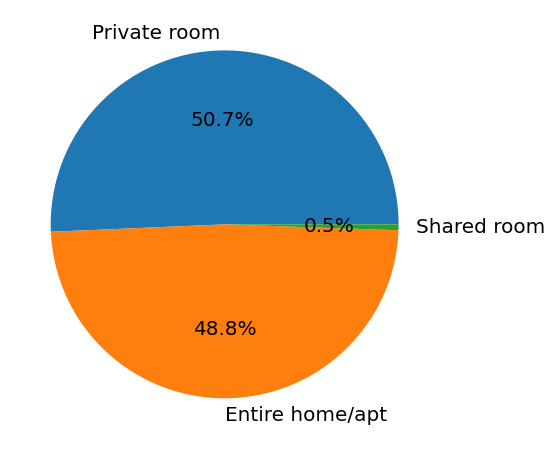

In [11]:
round((data["room_type"].value_counts()/data["room_type"].count())*100,2).plot(kind='pie', 
                                                                               autopct='%1.1f%%', 
                                                                               figsize=(8,8), fontsize=20)
plt.ylabel("");

Only 0.5% in the dataset has shared room! The rest is either private room or entire home/apt.

The question now is: what is the connection between room_type, room_shared and room_private?

The answer here can be given by taking only the features that I am interested and grouping them by the two features that I need to know.

In [12]:
rooms = data[["room_type","room_shared","room_private"]].groupby(["room_shared","room_private"]) #.apply(display)
for key, item in rooms:
    print("Key element:", key)
    print(rooms.get_group(key).value_counts())
    print()
    print()

Key element: (False, False)
room_type        room_shared  room_private
Entire home/apt  False        False           538
dtype: int64


Key element: (False, True)
room_type     room_shared  room_private
Private room  False        True            559
dtype: int64


Key element: (True, False)
room_type    room_shared  room_private
Shared room  True         False           6
dtype: int64




What do we understand?

Apparently, when the room_type is Private room then the column room_private gives True, and if the room_type is Shared room then the column room_shared gives True. It is like OneHotEncoder but with booleans specified only for the values of Private room and Shared room.

So, I can drop off the columns room_shared and room_private.

In [13]:
data = data.drop(["room_shared","room_private"], axis=1)
data.head(5)

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
0,194.033698,Private room,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772
1,344.245776,Private room,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432
2,264.101422,Private room,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103
3,433.529398,Private room,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663
4,485.552926,Private room,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508


####    At this stage, I also drop off the shared room because it is only 0.5% of the dataset!

In [14]:
data[data.room_type=="Shared room"]

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
73,479.225740,Shared room,2.0,True,0,0,10.0,96.0,1,1.377243,0.077917,29.097076,38.677287,4.89000,52.36100
247,258.008577,Shared room,3.0,True,1,0,10.0,98.0,1,7.174061,3.005379,3.410414,5.560980,4.79000,52.36000
536,288.707145,Shared room,3.0,False,1,0,10.0,95.0,1,3.607837,1.653982,5.638596,9.299854,4.90830,52.40430
975,192.861997,Shared room,4.0,False,1,0,8.0,84.0,1,9.401665,0.640685,2.598447,4.272531,4.97829,52.30676
1014,209.031472,Shared room,2.0,False,0,0,9.0,94.0,1,1.994462,1.801099,10.205282,17.656386,4.87100,52.38500
1102,258.008577,Shared room,2.0,False,0,0,8.0,90.0,1,0.280204,0.516217,28.273677,56.267226,4.89295,52.37575


In [15]:
data = data.drop(data[data.room_type=="Shared room"].index, axis=0)
data.reset_index(inplace=True)
data = data.drop("index",axis=1)

### Duplicates

Let's see if there are duplicated values...

In [16]:
dubli = data[data.duplicated(keep=False)]

dubli = dubli.groupby(list(dubli)).apply(lambda x: tuple(x.index))
dubli.apply(display)

Series([], dtype: float64)

Series([], dtype: float64)

There is one more simple way:

In [17]:
data.duplicated().any()

False

### Data types

Am I okay with the data types. Should I apply any change?

The data type is as expected. Maybe the multi and biz could be booleans but they have already been converted to integers.

# Neighbourhoods

Before I go on, I would like to include the neighbourhood names into the dataset. For this reason, I am using the geopandas in order to read the geometry of the neighbourhoods and then shapely to identify the neighbourhood of the longitude & latitude of the airbnb listing.

In [18]:
import geopandas

nbh_geo_df = geopandas.read_file('Amsterdam_neighbourhoods/neighbourhoods.geojson', driver='GeoJSON')

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-18-44be1193d4ee>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migrati

In [19]:
from shapely.geometry import Point

amsterdam_length = data.shape[0]

boroughs = [''] * amsterdam_length

for i in range(amsterdam_length):
    j=0
    b=None
    while j<len(nbh_geo_df.geometry.values):   
        specific_point = Point(data["lng"][i],data["lat"][i])
        neighbourhood = nbh_geo_df.geometry.values[j]
        if specific_point.within(neighbourhood):
            boroughs[i] = nbh_geo_df.neighbourhood[j]
            break
        j+=1


data["Neighbourhood"] = boroughs
data.head(5)

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,Neighbourhood
0,194.033698,Private room,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,4.90569,52.41772,Noord-West
1,344.245776,Private room,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,4.90005,52.37432,Centrum-West
2,264.101422,Private room,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,4.97512,52.36103,IJburg - Zeeburgereiland
3,433.529398,Private room,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,4.89417,52.37663,Centrum-West
4,485.552926,Private room,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,4.90051,52.37508,Centrum-West


Do all listings have a neighbourhood value?

In [20]:
data.Neighbourhood.value_counts().keys().tolist() in nbh_geo_df.neighbourhood.value_counts().keys().tolist()

False

Let's find out...

In [21]:
data.Neighbourhood.value_counts().keys()

Index(['Centrum-West', 'Centrum-Oost', 'De Pijp - Rivierenbuurt',
       'De Baarsjes - Oud-West', 'Zuid', 'Westerpark',
       'Oostelijk Havengebied - Indische Buurt', 'Bos en Lommer', 'Oud-Oost',
       'Noord-West', 'Oud-Noord', 'Watergraafsmeer',
       'IJburg - Zeeburgereiland', 'Gaasperdam - Driemond', 'Slotervaart',
       'De Aker - Nieuw Sloten', 'Geuzenveld - Slotermeer', 'Osdorp',
       'Bijlmer-Centrum', 'Noord-Oost', 'Buitenveldert - Zuidas',
       'Bijlmer-Oost', ''],
      dtype='object')

There are some which habe no neighbourhood value. Which?

One way to find them is with the method apply(lambda x: ....)

In [22]:
np.where(data.applymap(lambda x: x == ''))

(array([  8, 787, 799, 800]), array([15, 15, 15, 15]))

Two arrays are printed:
- First: the indices of the rows with empty values, and
- Second: the indices of the columns with empty values
    
Here, the column Neighbourhood is the 15th (starting from the 0th) and the rows are the 8, 790, 802, 803.

The other way:

In [23]:
data[data["Neighbourhood"]==""]

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,Neighbourhood
8,1001.804420,Entire home/apt,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,5.624761,9.328686,4.86459,52.40175,
787,351.041642,Entire home/apt,2.0,False,0,1,10.0,100.0,1,4.298415,0.418791,5.294105,8.953550,4.83378,52.38646,
799,639.983128,Entire home/apt,4.0,False,0,1,10.0,100.0,2,4.220556,0.312022,5.372118,9.418048,4.83529,52.38693,
800,297.612073,Entire home/apt,2.0,False,0,1,10.0,100.0,1,4.298145,0.412112,5.293153,8.961141,4.83382,52.38652,


I keep the index of the listings with no neighbourhood value into a list and visualize them.

In [24]:
index_no_neighbourhood = data[data["Neighbourhood"]==""].index


longitude = data.loc[index_no_neighbourhood[0],"lng"]
latitude = data.loc[index_no_neighbourhood[0],"lat"]

map = folium.Map(location=[latitude,longitude],
                 tiles="cartodbpositron",zoom_start=12.3)#Stamen Terrain 

for x in index_no_neighbourhood:
    longitude = data.loc[x,"lng"]
    latitude = data.loc[x,"lat"]
    folium.CircleMarker(location=[latitude,longitude],radius=6,fill_color="orange",
                        opacity=1.0,fill_opacity=0.5,fill=True,color=True).add_to(map)
for _, r in nbh_geo_df.iterrows():
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['neighbourhood']).add_to(geo_j)
    geo_j.add_to(map)


map

I make the decision to drop them off...

Drop off, reset index and drop the old index off.

In [25]:
data = data.drop(index_no_neighbourhood)
data.reset_index(inplace=True)
data = data.drop("index",axis=1)

At this point, it is good if I store in a dataframe the centroids of the neighbourhoods.

In [26]:
amsterdam_neighbourhoods = {"Neighbourhood": nbh_geo_df.neighbourhood.values,
                            "Neighbourhood Centroid": nbh_geo_df.geometry.centroid.values}

amsterdam_neighbourhoods = pd.DataFrame(amsterdam_neighbourhoods)
amsterdam_neighbourhoods

<ipython-input-26-5ae80999b1aa>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  "Neighbourhood Centroid": nbh_geo_df.geometry.centroid.values}


,Neighbourhood,Neighbourhood Centroid
0,Bijlmer-Oost,POINT (4.97732 52.32028)
1,Noord-Oost,POINT (5.00352 52.39834)
2,Noord-West,POINT (4.89459 52.41531)
3,Oud-Noord,POINT (4.91049 52.39407)
4,IJburg - Zeeburgereiland,POINT (4.99838 52.36090)
5,Centrum-West,POINT (4.88908 52.37643)
6,Oostelijk Havengebied - Indische Buurt,POINT (4.94149 52.37141)
7,Centrum-Oost,POINT (4.90829 52.36775)
8,Oud-Oost,POINT (4.91995 52.35780)
9,Watergraafsmeer,POINT (4.93106 52.34272)


We can also see the neighbourhoods with thier names.

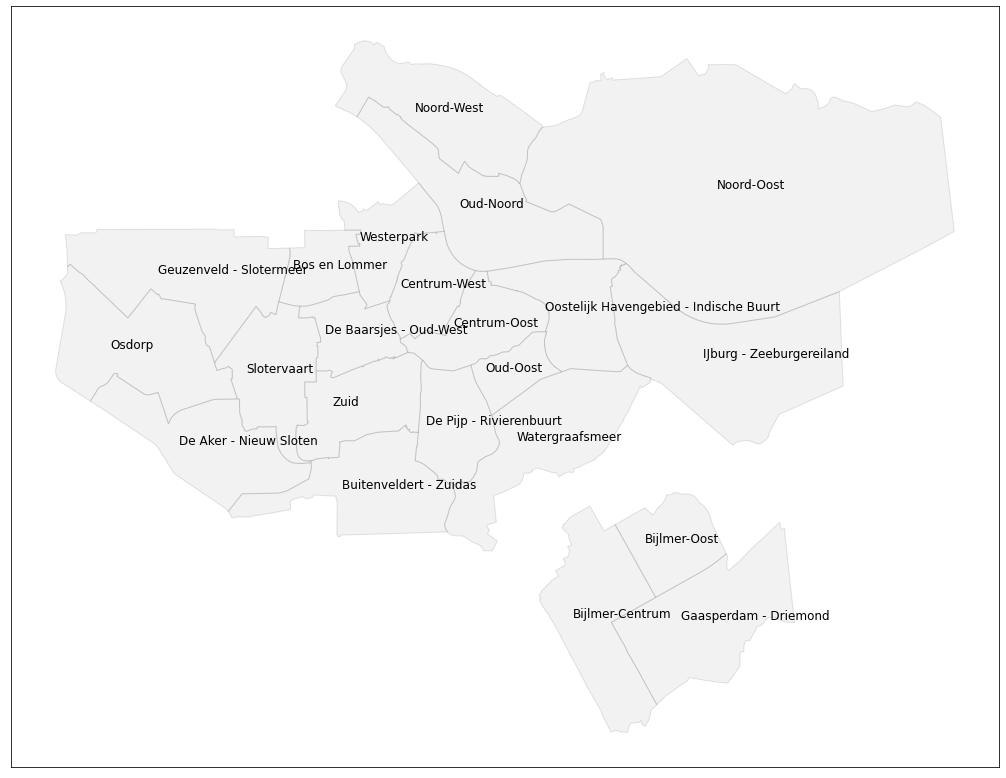

In [27]:
fig, ax = plt.subplots(1,1, figsize=(22,14))

nbh_geo_df.plot(ax = ax, alpha=0.1, color='grey', edgecolor='black')

for val in amsterdam_neighbourhoods["Neighbourhood"].keys():
    longitude = amsterdam_neighbourhoods["Neighbourhood Centroid"][val].x
    latitude = amsterdam_neighbourhoods["Neighbourhood Centroid"][val].y

    ax.text(longitude-0.01,latitude,amsterdam_neighbourhoods["Neighbourhood"][val], fontsize=12)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels("")
ax.set_yticklabels("");

# Exploratory Data Analysis, Statistical Analysis and Correlations

In this section I do exploratory data analysis, statistical analysis and I find correlations between features and the target.

I start with the persons capacity. What is the persons capacity?

In [28]:
print("Min:", data.person_capacity.min())
print("Max:", data.person_capacity.max())

Min: 2.0
Max: 6.0


Let's visualize the realSum in a boxplot, where I compare the room types (except of the case of shared room) for the different persons capacity.

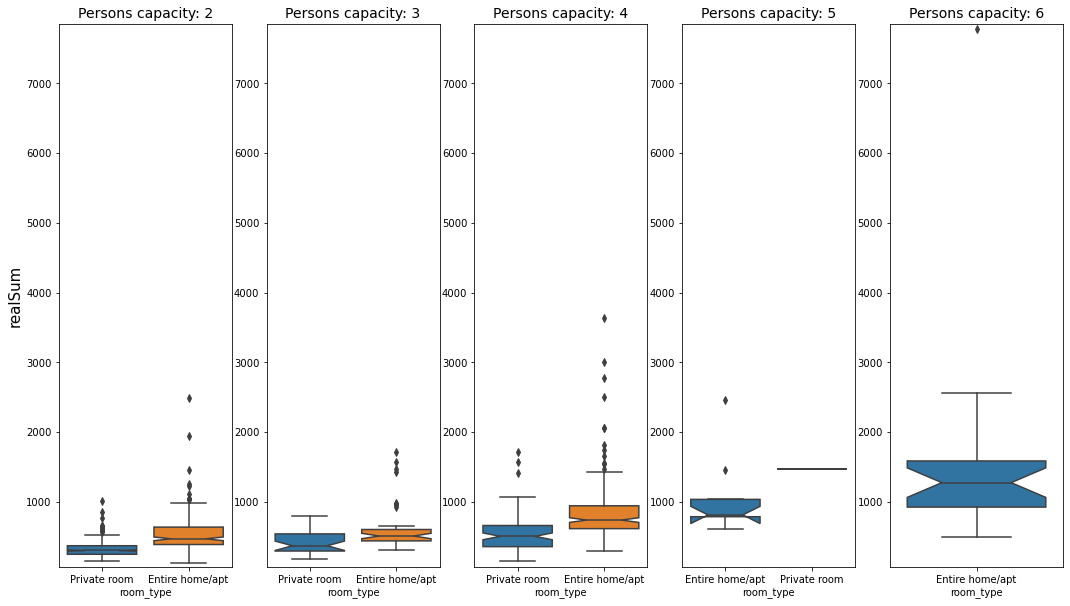

In [29]:
fig, ax = plt.subplots(1, 5, figsize=(18,10))

min_to_max = np.arange(data.person_capacity.min(),data.person_capacity.max()+1)


for i,x in enumerate(min_to_max):
    sns.boxplot(data = data[(data.person_capacity==x)], 
                    x = "room_type",
                    y = "realSum" ,
                    ax = ax[i],
                    notch=True)
  
    if i==0:
        ax[i].set_ylabel("realSum",fontsize=15)
    else:
        ax[i].set_ylabel("")
        
    ax[i].set_ylim(data.realSum.min()-70,data.realSum.max()+70)
    
    ax[i].set_title("Persons capacity: %s" %int(x), fontsize=14)

- For the case of 6 person capacity, we can see that there is no private room option. Here, we get the highest value of the dataset! It is close to 8000€ for an entire home with a capacity of 6 people!


- For the case of 5 person capacity, the private room option has only one. Additionally, the boxplot for entire home/apt option looks a bit weird (!!). The reason is that the notch's boundary is given by the $median ± 1.57 \frac{IQR}{\sqrt(n)}$. If the distance between median and the 25th percentile and the distance between median and the 75th percentile are extremely different (exactly like the entire home/apt option) and/or the sample size is low, the notch will be wider.

Let's see the how many of the different room types are there available per persons capacity.

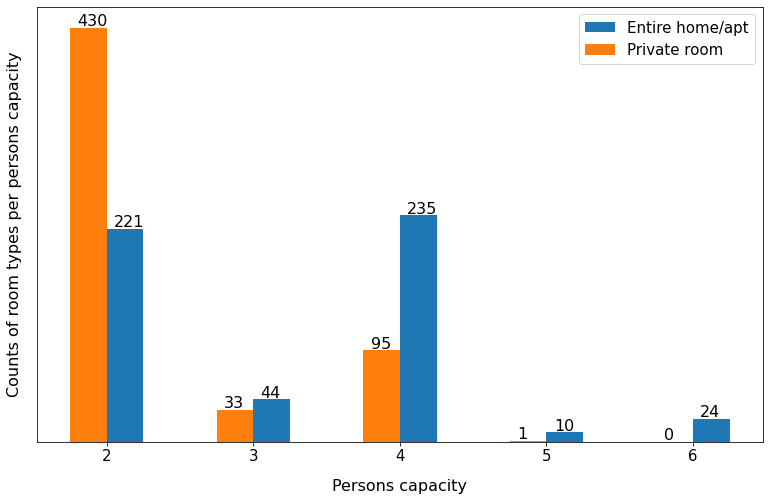

In [30]:
room_type_capacity = data[["room_type","person_capacity"]].groupby(["room_type","person_capacity"])

how_many_home, how_many_pr_room = [], []
for key, item in room_type_capacity:
    if key[0]=="Entire home/apt":
        how_many_home.append(room_type_capacity.get_group(key).value_counts().values[0])
    else:
        how_many_pr_room.append(room_type_capacity.get_group(key).value_counts().values[0])

how_many_pr_room.append(0)

####################################################################################################
##################################   Bar plot comparison   #########################################
####################################################################################################

fig, ax = plt.subplots(1,1,figsize=(13,8))

x = np.arange(len(how_many_pr_room))

width = 0.5
ax.bar(x+width/4, how_many_home, width=width/2, label="Entire home/apt")
ax.bar(x-width/4, how_many_pr_room, width=width/2, label="Private room")
ax.legend(fontsize=15)

ax.set_xticks(x)
ax.set_xticklabels(min_to_max.astype(int), fontsize=15)

ax.set_yticks([])
ax.set_yticklabels("")

ax.set_ylabel("Counts of room types per persons capacity", fontsize=16, labelpad=15)
ax.set_xlabel("Persons capacity", fontsize=16, labelpad=15)

for i in range(5):
    ax.text(i-0.2,how_many_pr_room[i]+2,how_many_pr_room[i], fontsize=16)
    ax.text(i+0.05,how_many_home[i]+2,how_many_home[i], fontsize=16)

After checking out the person capacity per room type, it must be worthy to check out the mean of the realSum per room type for each of the neighbourhoods. 

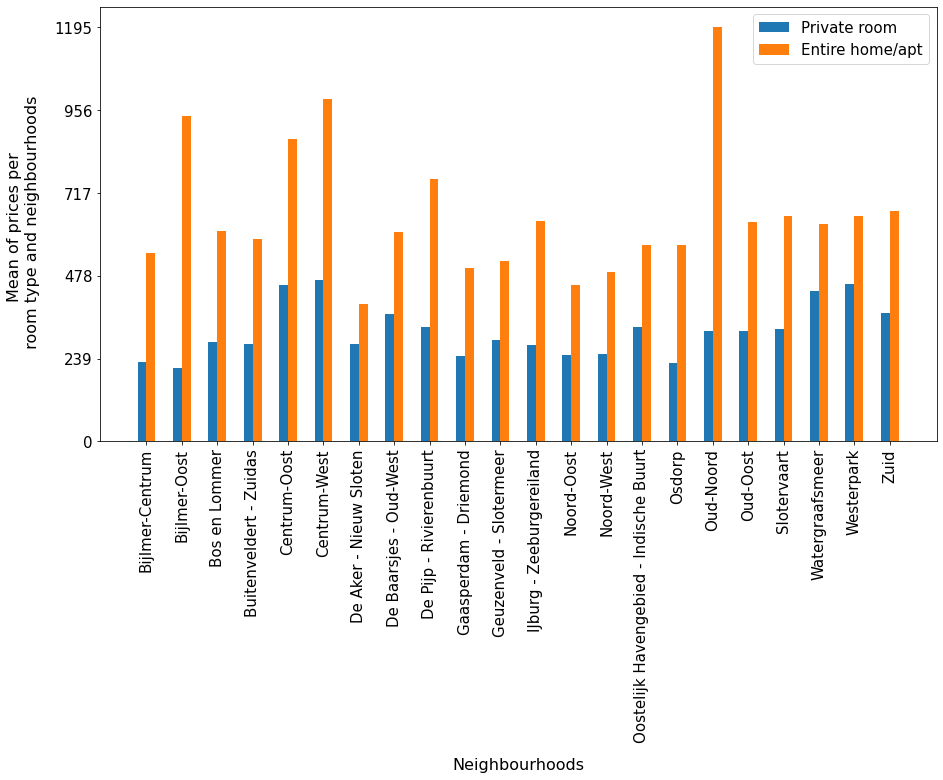

In [31]:
mean_realSum_neigh_pr_room = data[data.room_type=="Private room"].groupby("Neighbourhood").realSum.mean().values
mean_realSum_neigh_ent_home = data[data.room_type=="Entire home/apt"].groupby("Neighbourhood").realSum.mean().values

for_neigh = data[data.room_type=="Entire home/apt"].groupby("Neighbourhood").realSum.mean().keys()

####################################################################################################
##################################   Bar plot comparison   #########################################
####################################################################################################

fig, ax = plt.subplots(1,1,figsize=(15,8))

x = np.arange(len(for_neigh))

width = 0.5
ax.bar(x-width/4, mean_realSum_neigh_pr_room, width=width/2, label="Private room")
ax.bar(x+width/4, mean_realSum_neigh_ent_home, width=width/2, label="Entire home/apt")
ax.legend(fontsize=15)

ax.set_xticks(x)
ax.set_xticklabels(for_neigh, rotation=90, fontsize=15)

y_ticks = np.linspace(0,max([max(mean_realSum_neigh_ent_home),max(mean_realSum_neigh_pr_room)]),6).astype(int)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=15)

ax.set_ylabel("Mean of prices per \n room type and neighbourhoods", fontsize=16, labelpad=15)
ax.set_xlabel("Neighbourhoods", fontsize=16, labelpad=15);

The barplots above is a very simple comparison to compare the mean values of the two groups (entire home/apt vs private room). It is obvious that the entire home/apt option costs more than the other for all neighbourhoods, there are neighbourhoods which are even three times higher. 

On the other hand, this comparison has not included the number of listings per neighbourhood for the two comparing groups. Let's see the price variance per group in each neighbourhood.

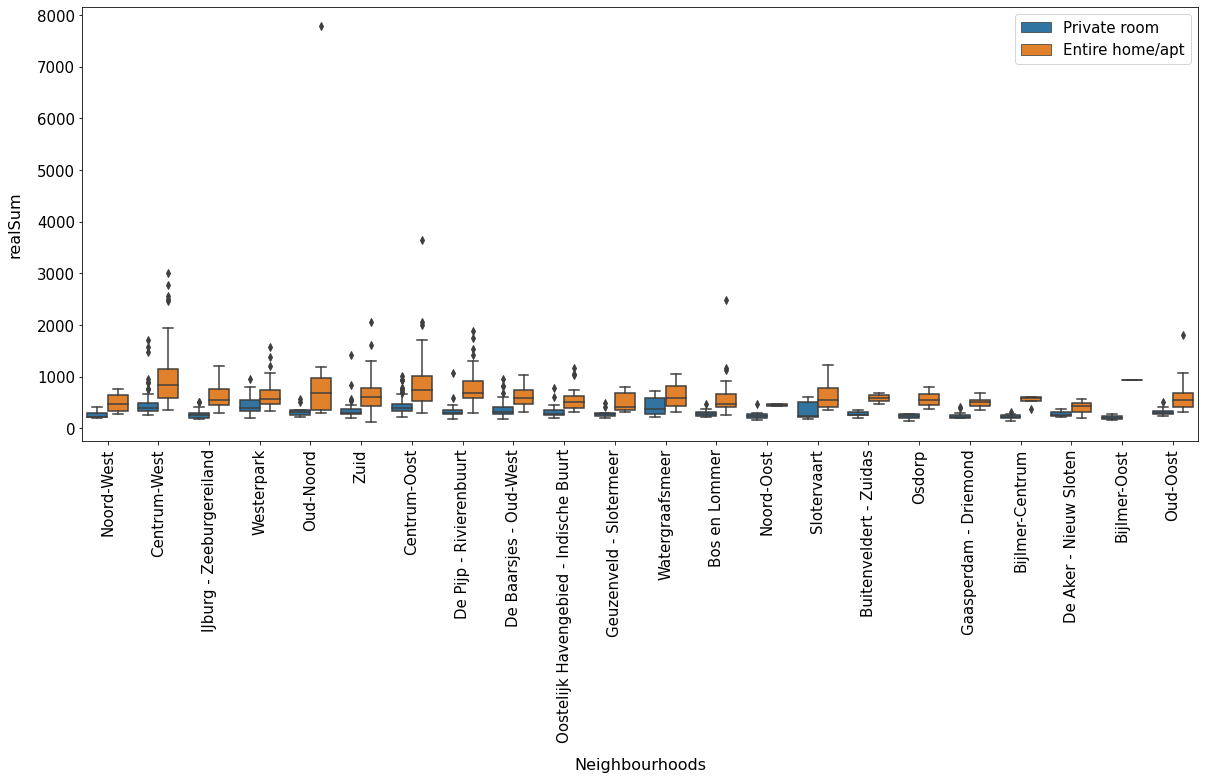

In [32]:
fig, ax = plt.subplots(1,1,figsize=(20,8))

sns.boxplot(data = data,
            x = "Neighbourhood",
            y = "realSum",
            hue = "room_type",
            ax = ax)

ax.legend(fontsize=15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=15, rotation=90)

y_ticks = np.arange(0,9000,1000)
ax.set_yticks(y_ticks);
ax.set_yticklabels(y_ticks, fontsize=15)

ax.set_ylabel("realSum", fontsize=16, labelpad=15)
ax.set_xlabel("Neighbourhoods", fontsize=16, labelpad=15);

Normally, one has to apply variance test (scipy -> levene) to check the variance. Only at Buitenveldert-Zuidas the variance could be similar between the two groups while for the rest neighbourhoodslooks completely unequal. However, without applying the test it is hard to say. Additionally, in Oud-Noord the entire home/apt provides the highest realSum of the dataset, about 8000€!

Question: Do I need to make a variance test in each neighbourhood for the price prediction? 

As I want to forecast from the whole dataset, the variance test in the neighbourhoods is not needed.

Let's visualize the mean value of price per room type group for each neighbourhood.

In [33]:
nbh_geo_df = nbh_geo_df.rename(columns={"neighbourhood":"Neighbourhood"})

In [34]:
mean_realSum_per_neigh_ent_home = pd.DataFrame(data[data.room_type=="Entire home/apt"].groupby("Neighbourhood").realSum.mean()).reset_index()
mean_realSum_per_neigh_ent_home = mean_realSum_per_neigh_ent_home.merge(nbh_geo_df,on="Neighbourhood")
mean_realSum_per_neigh_ent_home = mean_realSum_per_neigh_ent_home.drop(["neighbourhood_group"], axis=1)

# follow the same for the private room
mean_realSum_per_neigh_priv_room = pd.DataFrame(data[data.room_type=="Private room"].groupby("Neighbourhood").realSum.mean()).reset_index()
mean_realSum_per_neigh_priv_room = mean_realSum_per_neigh_priv_room.merge(nbh_geo_df,on="Neighbourhood")
mean_realSum_per_neigh_priv_room = mean_realSum_per_neigh_priv_room.drop(["neighbourhood_group"], axis=1)

#### Amsterdam city center

In [35]:
city_center = [52.377956,4.897070]

In [36]:
def visualization_with_folium(data_vis, data_room, center):
    
    map = folium.Map(location=center,
                     tiles="cartodbpositron",zoom_start=10.5) 
    folium.Marker(location=center,
                  icon = folium.Icon(color='black')).add_to(map)

    for i in range(len(data_vis['lat'])):
        latitude = data_vis['lat'][i]
        longitude = data_vis['lng'][i]
        folium.CircleMarker(location=[latitude,longitude],radius=6,fill_color="black",
                            opacity=0.8,fill_opacity=0.4,fill=True,color=True).add_to(map)

    

    folium.Choropleth(geo_data=nbh_geo_df,
                      name="choropleth",
                      data=data_room.realSum,
                      columns=["Neighbourhood", "realSum"],
                      key_on="feature.id",
                      fill_color="RdYlGn",
                      fill_opacity=0.6,
                      line_opacity=0.6,
                      legend_name="Mean of Total Prices",).add_to(map)

    folium.LayerControl().add_to(map)

    return map    

### - For the option of Entire home/apt

In [37]:
dataset = data[data.room_type=="Entire home/apt"]
dataset.reset_index(inplace=True)
dataset = dataset.drop("index", axis=1)

visualization_with_folium(dataset, mean_realSum_per_neigh_ent_home, city_center)

### - For the option of Private room

In [38]:
dataset = data[data.room_type=="Private room"]
dataset.reset_index(inplace=True)
dataset = dataset.drop("index", axis=1)

visualization_with_folium(dataset, mean_realSum_per_neigh_priv_room, city_center)

The black icon represents the Amsterdam city center, the dots are the listings and the colored neighbourhoods are the mean values where the color is based on the colorbar on the top right side of the graph. 

These graphs are in the Figures folder of the repocitory. 

### Data preprocessing to apply some statistical test

I will continue with some statistical analysis and check of correlations. For this, I must nncode the booleans features.

The boolean columns are room_type and host_is_superhost

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# room_type
col = "room_type"
print(col)
le.fit(data[col])
print(le.classes_)
data[col] = le.transform(data[col])
le.fit(data[col])
print(le.classes_)
print()
print()


# host_is_superhost
col = "host_is_superhost"
print(col)
le.fit(data[col])
print(le.classes_)
data[col] = le.transform(data[col])
le.fit(data[col])
print(le.classes_)

room_type
['Entire home/apt' 'Private room']
[0 1]


host_is_superhost
[False  True]
[0 1]


One of my targets is to predict the prices. The realSum column is a continuous feature. I will need to find out correlations between the dependent variables and the target! This means that I have to find out correlations between:
- two continuous columns
- a continuous column and a categorical column.


#### Check between a continuous column and a categorical column

In my dataset, I have columns that are continuous but they are actually categorical with a float data type, such as the person_capacity, bedrooms, cleanliness rating (one could even consider the guest_overall_satisfaction). For the correlation between a categorical and a continuous variable, I will use the Point-Biserial Correlation. This correlation takes assumptions by default:
- the data are normally distributed
- no outliers
- equal variances

I must check all those for the target column.


**Question:** Which dependent variables vs realSum are worthy to be checked with the Point Biserial Correlation?

**Answer:** The room_type, person_capacity, bedrooms, biz, multi, host_is_superhost and the cleanliness_rating

Before the step of correlations checking, I must check out the normality of the realSum (if data are normally distributed). There are different ways to check it:
- histograms
- Q-Q plot
- Shapiro-Wilk Test
- Kolmogorov-Smirnov Test

I will apply only Kolmogorov–Smirnov test. My dataset is very large for Shapiro-Wilk Test.

Then, I must check out the outliers and in the end if the variance between the classes of the dependent variables is equal.

I copy the data:

In [40]:
data_for_test = data.copy()

#### Are the data of the independent variable normally distributed?

In [41]:
from scipy.stats import kstest

stat_result, p_value = kstest(data_for_test["realSum"],"norm")

print("Test result:", stat_result)
if p_value<0.05:
    print("The data are not normally distributed.")
else:
    print("The data are normally distributed.")

Test result: 1.0
The data are not normally distributed.


I will apply the Quantile Transformer from scikit-learn to transform the data and then I will apply again the test.

In [42]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

realSum_qt = qt.fit_transform(data_for_test.realSum.values.reshape(-1,1)).reshape(1,-1)[0]
data_for_test["realSum_QT"] = realSum_qt

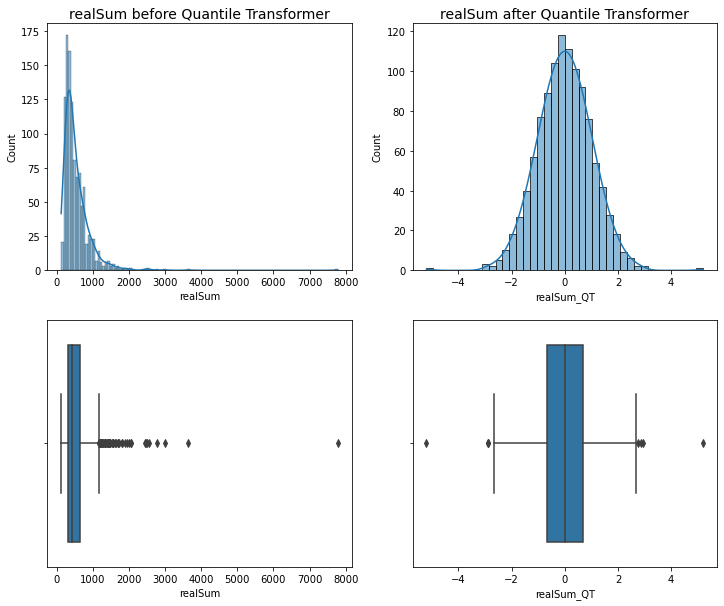

In [43]:
fig, ax = plt.subplots(2,2,figsize=(12,10))

sns.histplot(data_for_test, x="realSum", kde=True, ax=ax[0,0])
sns.histplot(data_for_test, x="realSum_QT", kde=True, ax=ax[0,1])

ax[0,0].set_title("realSum before Quantile Transformer", fontsize=14)
ax[0,1].set_title("realSum after Quantile Transformer", fontsize=14)

#########################################################################
#########################################################################
sns.boxplot(x=data_for_test["realSum"], ax=ax[1,0])
sns.boxplot(x=data_for_test["realSum_QT"], ax=ax[1,1]);

#### Are there outliers?

After applying the Quantile Transformer, there are a few points outliers. To detect them, I will apply the LocalOutlierFactor, an algorithm of nearest neighbors.

In [44]:
################################################################################################
###############################      Check for Outliers     ####################################
################################################################################################
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
good = lof.fit_predict(data_for_test.realSum_QT.to_numpy().reshape(-1,1)) == 1
    
dropped_points = []
for i in range(len(good)):
    if good[i]==False:
        dropped_points.append(i)
  

data_for_test = data_for_test.drop(dropped_points, axis=0)
data_for_test = data_for_test.reset_index()
data_for_test = data_for_test.drop("index",axis=1)

Let's check now if there are outliers!!

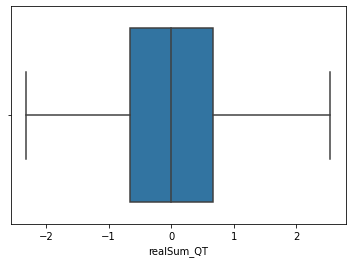

In [45]:
sns.boxplot(x=data_for_test["realSum_QT"]);

#### Is the variance of the target column for the categorical features equal?

By experience with boxplots:

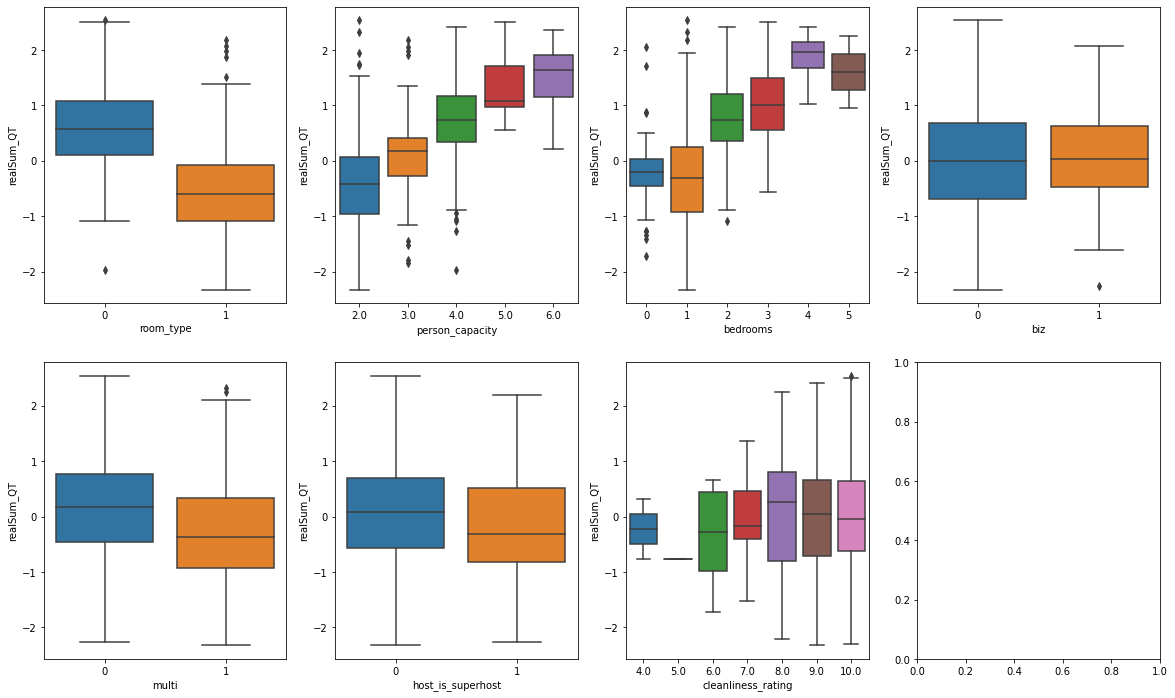

In [46]:
categorical_var_corr = ["room_type", "person_capacity", "bedrooms", "biz", 
                        "multi", "host_is_superhost","cleanliness_rating"]


fig, ax = plt.subplots(2,4,figsize=(20,12))
ax = ax.flatten()

for i, var in enumerate(categorical_var_corr):
    sns.boxplot(data=data_for_test, x=var, y="realSum_QT", ax=ax[i])

I must check it with the levene method of scipy:

In [47]:
from scipy.stats import levene

In [48]:
print("Room type")
var = "room_type"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(1)["realSum_QT"].values

stat, p = levene(group_a, group_b)
if p<0.05:
    print("Null Hypothesis is rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Room type
Null hypothesis is strong. The variance of the groups is equal!


In [49]:
print("Persons capacity")
var = "person_capacity"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(2.0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(3.0)["realSum_QT"].values
group_c = data_for_test[["realSum_QT",var]].groupby(var).get_group(4.0)["realSum_QT"].values
group_d = data_for_test[["realSum_QT",var]].groupby(var).get_group(5.0)["realSum_QT"].values
group_e = data_for_test[["realSum_QT",var]].groupby(var).get_group(6.0)["realSum_QT"].values


stat, p = levene(group_a, group_b, group_c, group_d, group_e)
if p<0.05:
    print("Null Hypothesis rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Persons capacity
Null Hypothesis rejected. The variance of the groups is not equal!


In [50]:
print("Bedrooms")
var = "bedrooms"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(1)["realSum_QT"].values
group_c = data_for_test[["realSum_QT",var]].groupby(var).get_group(2)["realSum_QT"].values
group_d = data_for_test[["realSum_QT",var]].groupby(var).get_group(3)["realSum_QT"].values
group_e = data_for_test[["realSum_QT",var]].groupby(var).get_group(4)["realSum_QT"].values
group_f = data_for_test[["realSum_QT",var]].groupby(var).get_group(4)["realSum_QT"].values

stat, p = levene(group_a, group_b, group_c, group_d, group_e, group_f)
if p<0.05:
    print("Null Hypothesis rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Bedrooms
Null Hypothesis rejected. The variance of the groups is not equal!


In [51]:
print("Biz")
var = "biz"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(1)["realSum_QT"].values

stat, p = levene(group_a, group_b)
if p<0.05:
    print("Null Hypothesis is rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Biz
Null Hypothesis is rejected. The variance of the groups is not equal!


In [52]:
print("Multi")
var = "multi"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(1)["realSum_QT"].values

stat, p = levene(group_a, group_b)
if p<0.05:
    print("Null Hypothesis is rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Multi
Null hypothesis is strong. The variance of the groups is equal!


In [53]:
print("Host is superhost")
var = "host_is_superhost"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(1)["realSum_QT"].values

stat, p = levene(group_a, group_b)
if p<0.05:
    print("Null Hypothesis is rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Host is superhost
Null hypothesis is strong. The variance of the groups is equal!


In [54]:
print("Cleanliness rating")
var = "cleanliness_rating"
group_a = data_for_test[["realSum_QT",var]].groupby(var).get_group(4.0)["realSum_QT"].values
group_b = data_for_test[["realSum_QT",var]].groupby(var).get_group(5.0)["realSum_QT"].values
group_c = data_for_test[["realSum_QT",var]].groupby(var).get_group(6.0)["realSum_QT"].values
group_d = data_for_test[["realSum_QT",var]].groupby(var).get_group(7.0)["realSum_QT"].values
group_e = data_for_test[["realSum_QT",var]].groupby(var).get_group(8.0)["realSum_QT"].values
group_f = data_for_test[["realSum_QT",var]].groupby(var).get_group(9.0)["realSum_QT"].values
group_g = data_for_test[["realSum_QT",var]].groupby(var).get_group(10.0)["realSum_QT"].values

stat, p = levene(group_a, group_b, group_c, group_d, group_e, group_f, group_g)
if p<0.05:
    print("Null Hypothesis rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Cleanliness rating
Null hypothesis is strong. The variance of the groups is equal!


Is it really the case for the last one? Let's check it with barlett.

In [55]:
from scipy.stats import bartlett

stat, p = bartlett(group_a, group_b, group_c, group_d, group_e, group_f, group_g)
if p<0.05:
    print("Null Hypothesis rejected. The variance of the groups is not equal!")
else:
    print("Null hypothesis is strong. The variance of the groups is equal!")

Null hypothesis is strong. The variance of the groups is equal!


/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2304: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


The variance of realSum is similar for:
- room_type
- multi
- host_is_superhost
- cleanliness_rating


So, I can continue to check the correlation by using the Point-Biserial Correlation.

In [56]:
from scipy import stats

categorical_var_corr = ["room_type", "multi", "host_is_superhost","cleanliness_rating"]

for col in categorical_var_corr:
    a = data_for_test[col]
    b = data_for_test.realSum_QT
    print(col)
    corr_coef, p = stats.pointbiserialr(a, b)
    print("Correlation coefficient:", round(corr_coef,5))
    print("Probability value:", round(p,5))
    print()
    print()

room_type
Correlation coefficient: -0.61587
Probability value: 0.0


multi
Correlation coefficient: -0.20669
Probability value: 0.0


host_is_superhost
Correlation coefficient: -0.1006
Probability value: 0.00095


cleanliness_rating
Correlation coefficient: 0.0088
Probability value: 0.77306




So, cleanless rating has a correlation with the transformed realSum!

Before I go on to the correlations between continuous coumns, I would like to check the agreement and disagreement between the person_capacity and the bedrooms. I will do it with the kendall-tau method.

In [57]:
a = data_for_test.person_capacity.values
b = data_for_test.bedrooms.values

corr_coef, p = stats.kendalltau(a,b)

corr_coef

0.6267128241590708

### Correlations

The correlation coefficient is closer to 1, so there is a strong agreement between these two categorical variables.

Let's see the correlation between realSum and the continuous columns. I will check with the methods of corr() in two ways:
- without quantile transformer to any of the continuous columns
- with quantile transformer to all of the continuous columns

Before I apply the transformer, let's see if they are normally distributed:

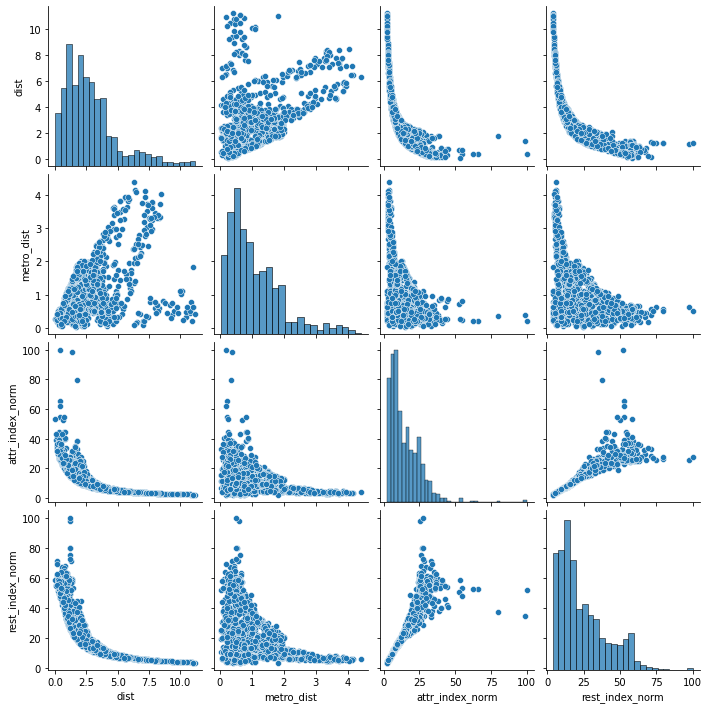

In [58]:
continuous_var_corr = ["dist","metro_dist","attr_index_norm","rest_index_norm"]

sns.pairplot(data = data[continuous_var_corr])

They are not! But we see something very interesting, the attr_index_norm and rest_index_norm are correlated non-linearly to the dist! We keep it in mind for later!

Appy quantile transformer to the columns:

In [59]:
dist_qt = qt.fit_transform(data_for_test.dist.values.reshape(-1,1)).reshape(1,-1)[0]
data_for_test["dist_QT"] = dist_qt

metro_dist_qt = qt.fit_transform(data_for_test.metro_dist.values.reshape(-1,1)).reshape(1,-1)[0]
data_for_test["metro_dist_QT"] = metro_dist_qt

attr_index_norm_qt = qt.fit_transform(data_for_test.attr_index_norm.values.reshape(-1,1)).reshape(1,-1)[0]
data_for_test["attr_index_norm_QT"] = attr_index_norm_qt

rest_index_norm_qt = qt.fit_transform(data_for_test.rest_index_norm.values.reshape(-1,1)).reshape(1,-1)[0]
data_for_test["rest_index_norm_QT"] = dist_qt

Let's check out visually if they are normally distributed:

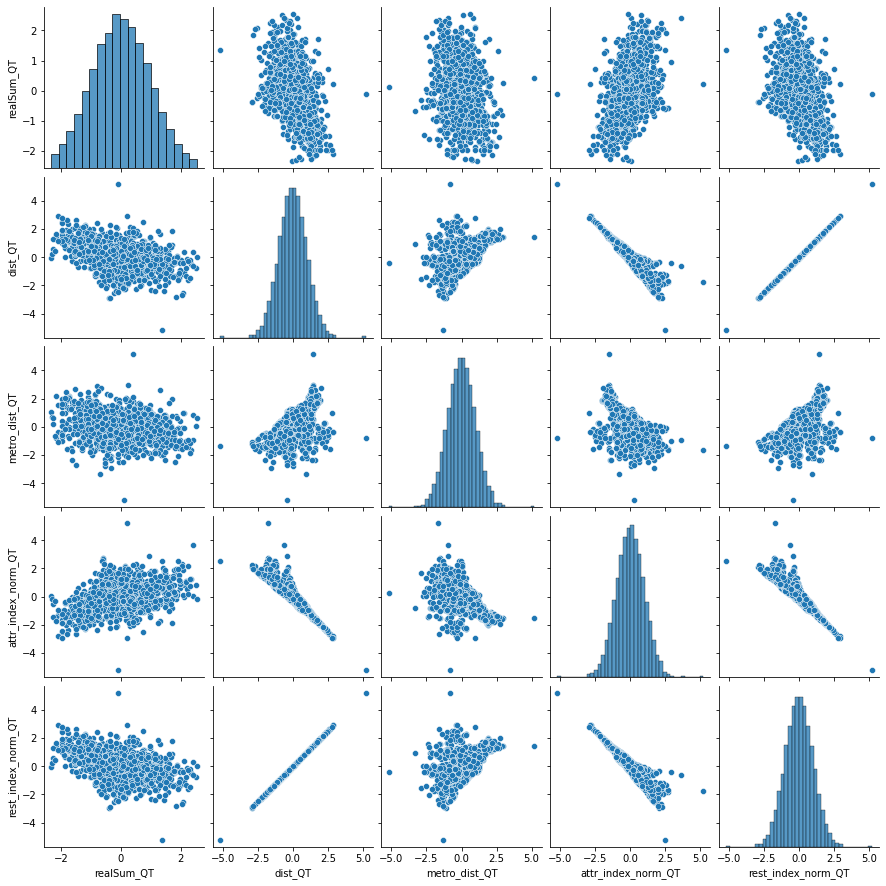

In [60]:
sns.pairplot(data_for_test[["realSum_QT","dist_QT","metro_dist_QT","attr_index_norm_QT","rest_index_norm_QT"]])

**The quantile transformer creates a strong linear correlation between dist_QT and rest_index_norm_QT!** Same applies for dist_QT and attr_index_norm_QT. 

Now, I can draw the correlations between the continuous columns into a table

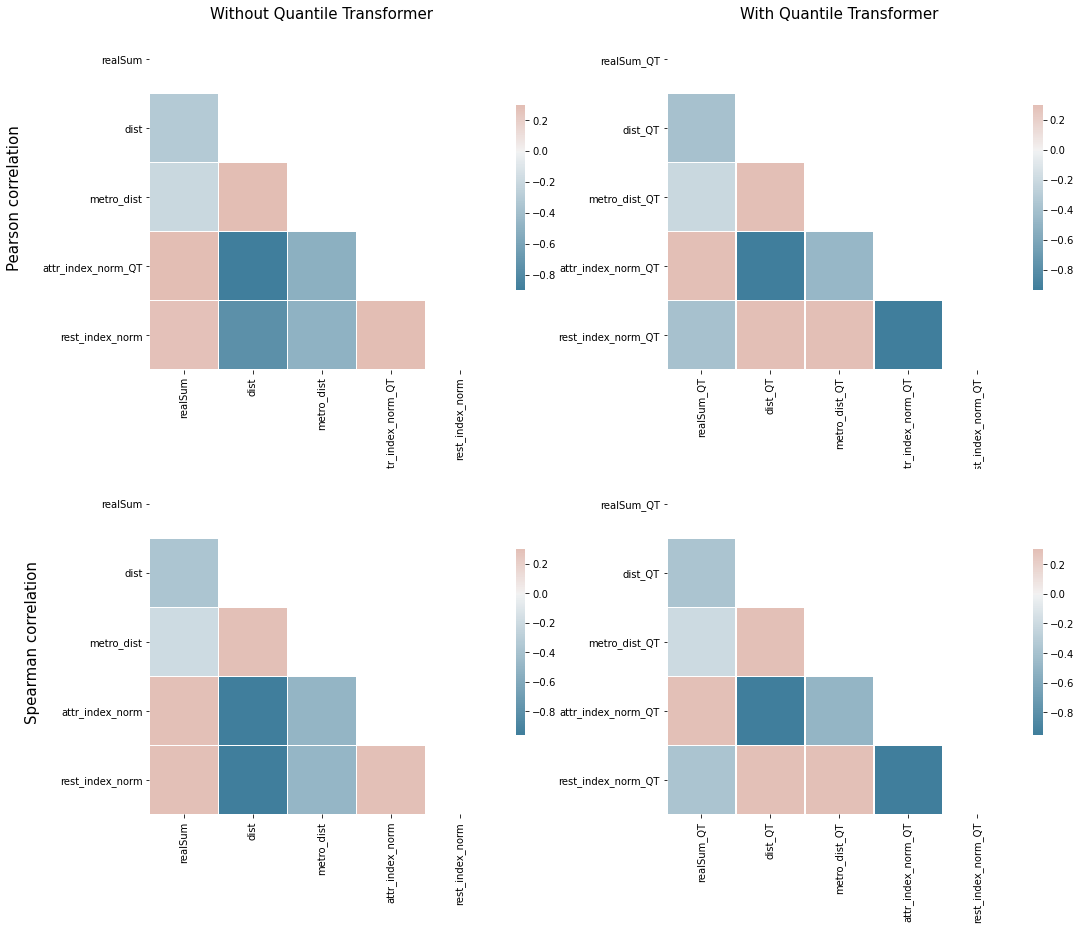

In [61]:
corr_pearson = data_for_test[["realSum","dist","metro_dist",
                                 "attr_index_norm_QT","rest_index_norm"]].corr(method="pearson")

corr_spearman = data_for_test[["realSum","dist","metro_dist",
                                 "attr_index_norm","rest_index_norm"]].corr(method="spearman")
########################################################################################################
########################################################################################################
corr_qt_pearson = data_for_test[["realSum_QT","dist_QT","metro_dist_QT",
                                 "attr_index_norm_QT","rest_index_norm_QT"]].corr(method="pearson")

corr_qt_spearman = data_for_test[["realSum_QT","dist_QT","metro_dist_QT",
                                 "attr_index_norm_QT","rest_index_norm_QT"]].corr(method="spearman")
########################################################################################################
########################################################################################################

all_together = [corr_pearson, corr_qt_pearson, corr_spearman, corr_qt_spearman]

########################################################################################################
########################################################################################################
fig, ax = plt.subplots(2,2, figsize=(17,15))
ax = ax.flatten()

for i in range(len(ax)):
    mask = np.triu(np.ones_like(all_together[i], dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(all_together[i], ax = ax[i], mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});
    
ax[0].set_ylabel("Pearson correlation", labelpad=20, fontsize=15)
ax[2].set_ylabel("Spearman correlation", labelpad=20, fontsize=15)

ax[0].set_title("Without Quantile Transformer", fontsize=15)
ax[1].set_title("With Quantile Transformer", fontsize=15);

Unfortunately, there is not really a strong correlation between realSum and the other given features. 

By the way, the link below gives a nice overview of the methods pearson, kendall and spearman.

https://medium.com/brdata/correlation-straight-to-the-point-e692ab601f4c

# Regression - Prediction of the prices

It is now time to predict the prices. 

- Split the dataset into 30% test size vs 70% training size
- Tune the hyperparameters of the models
- Select the best model and check the $R^2$ by folding the dataset 10 times
- Check the features importance
- Visualize the actual values vs prediction values

In [62]:
included_columns = ["room_type","person_capacity","host_is_superhost","multi","biz","cleanliness_rating",
                    "guest_satisfaction_overall","dist_QT","metro_dist_QT","attr_index_norm_QT","rest_index_norm_QT","realSum_QT"]

data_regr = data_for_test[included_columns]

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for col in ["person_capacity", "guest_satisfaction_overall", "cleanliness_rating"]:
    ss.fit(data_regr[col].to_numpy().reshape(-1,1))
    data_regr[col] = ss.transform(data_regr[col].to_numpy().reshape(-1,1))

<ipython-input-63-c651234bb57c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_regr[col] = ss.transform(data_regr[col].to_numpy().reshape(-1,1))
<ipython-input-63-c651234bb57c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_regr[col] = ss.transform(data_regr[col].to_numpy().reshape(-1,1))
<ipython-input-63-c651234bb57c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [64]:
data_regr.head(4)

,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,dist_QT,metro_dist_QT,attr_index_norm_QT,rest_index_norm_QT,realSum_QT
0,1,-0.758052,0,1,0,0.671798,-0.225814,1.187068,1.526760,-1.291733,1.187068,-2.096113
1,1,1.167955,0,0,0,-1.833763,-1.540976,-1.548981,-1.363763,1.749775,-1.548981,-0.451953
2,1,-0.758052,0,0,1,-0.580983,-1.212186,1.309094,2.146818,-1.347585,1.309094,-1.092646
3,1,1.167955,0,0,1,-0.580983,-0.719000,-1.726595,-0.768530,1.159586,-1.726595,0.018290


Import the libraries that I need for the models and the metrics.

In [65]:
# regressor algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# model selection 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# metrics
from sklearn.metrics import r2_score

#### Models

In [66]:
# Lasso, Ridge
parameters = {'alpha':[0.001, 0.01, 0.1, 1]}

GD_Lasso = GridSearchCV(Lasso(),
                        param_grid=parameters, 
                        scoring='r2')

GD_Ridge = GridSearchCV(Ridge(),
                        param_grid=parameters, 
                        scoring='r2')


# Elastic Net 
parameters = {'alpha': [0.001, 0.01, 0.1, 1],
              'l1_ratio': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1.0]}

GD_elnet = GridSearchCV(ElasticNet(),
                        param_grid=parameters, 
                        scoring='r2',
                        n_jobs=-1)

# K-nearest neighbors regressor

parameters = {'n_neighbors': [i for i in range(2,44,4)]}

GD_knn = GridSearchCV(KNeighborsRegressor(),
                        param_grid=parameters, 
                        scoring='r2')


# Decision Trees, Random Forest, Gradient Boosting
parameters = {'max_depth': [i for i in range(2,10)],
              'min_samples_split': [i for i in range(2,10)],
              'min_samples_leaf': [i for i in range(2,10)]}
              
# Decision Trees
GD_DT = GridSearchCV(DecisionTreeRegressor(),
                     param_grid=parameters, 
                     scoring='r2')

# Random Forest
GD_RF = GridSearchCV(RandomForestRegressor(),
                     param_grid=parameters, 
                     scoring='r2')

# Gradient Boosting
GD_GB = GridSearchCV(GradientBoostingRegressor(),
                     param_grid=parameters, 
                     scoring='r2')


models = {'Lasso Regression': GD_Lasso,
          'Ridge Regression': GD_Ridge,
          'Elastic Net': GD_elnet,
          'k-NN regressor': GD_knn,
          'Decision Trees Regressor': GD_DT,
          'Random Forest Regressor': GD_RF,
          'Gradient Boosting Regressor': GD_GB}

#### Split the data

In [67]:
X, y = data_regr[[col for col in data_regr.columns if col!="realSum_QT"]], data_regr["realSum_QT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train the models

In [68]:
results_col = ['Regressor', 'R^squared']
results = pd.DataFrame(columns=results_col)

l = 0

r2_models, max_error_models = [], [] 

for model_name, model in models.items():
    print(model_name)
    model.fit(X_train,y_train)
    
    r2 = cross_val_score(model.best_estimator_, X, y, cv=10, scoring='r2')
    r2_models.append(r2)    
    
      
    results.loc[l] = [model_name,
                      '%s $\pm$ %s' %(round(r2.mean(),3),round(r2.std(),3))]
    l+=1

Lasso Regression
Ridge Regression
Elastic Net
k-NN regressor
Decision Trees Regressor
Random Forest Regressor
Gradient Boosting Regressor


In [69]:
results

,Regressor,R^squared
0,Lasso Regression,0.675 $\pm$ 0.025
1,Ridge Regression,0.675 $\pm$ 0.027
2,Elastic Net,0.675 $\pm$ 0.026
3,k-NN regressor,0.623 $\pm$ 0.024
4,Decision Trees Regressor,0.641 $\pm$ 0.033
5,Random Forest Regressor,0.673 $\pm$ 0.029
6,Gradient Boosting Regressor,0.683 $\pm$ 0.021


Gradient Bossting regressor gives the best results for $R^2$. Let's see the optimized hyperparameters:

In [70]:
models['Gradient Boosting Regressor'].best_estimator_

GradientBoostingRegressor(max_depth=2, min_samples_leaf=7, min_samples_split=6)

Box-plots to compare the algorithms results on the different dataset folds

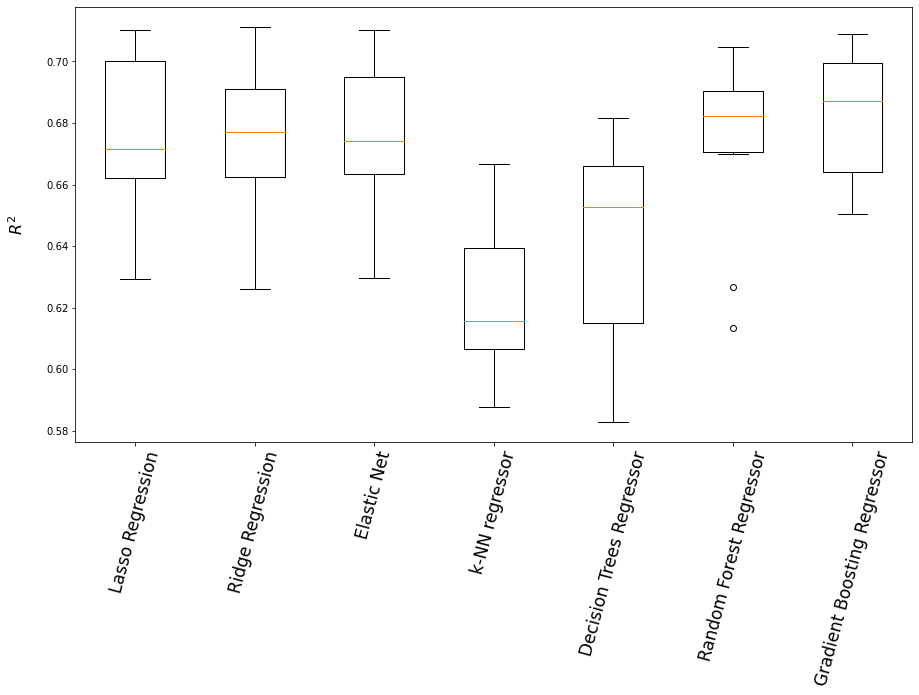

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

ax.boxplot(r2_models)

ax.set_ylabel('$R^2$', labelpad=20, fontsize=16)

xticks = np.arange(1,len(r2_models)+1)
ax.set_xticks(xticks)
ax.set_xticklabels(models.keys(), fontsize=17, rotation=75);

### Features importances

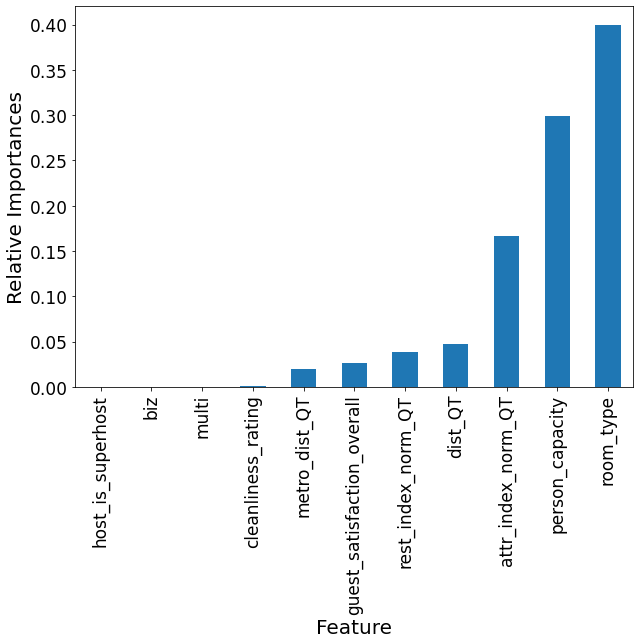

In [91]:
best_model = models['Gradient Boosting Regressor'].best_estimator_
feature_importances = pd.Series(best_model.feature_importances_,data_regr.columns[:-1]).sort_values(ascending=True)

fig, ax = plt.subplots(1,1,figsize=(10,7))

feature_importances.plot(kind='bar', fontsize=17)
ax.set_xlabel('Feature', fontsize=20)
ax.set_ylabel('Relative Importances', fontsize=20);

So, room_type - person_capacity, attr_index_norm_QT and dist_QT are the the most import features for predicting the price of the airbnb.

I find the predicted values into all of the dataset

In [92]:
# Inverse transform for the Predicted Values
pred = models['Gradient Boosting Regressor'].best_estimator_.predict(X)

# Create a DataFrame which includes actual value, predicted value and the difference
df = {'Actual values': np.around(y.to_numpy().flatten(),2),
      'Pred. values': np.around(pred,2),
      'Difference': np.around(abs(y.to_numpy().flatten() - pred),2)}

df = pd.DataFrame(df)
df.head()

,Actual values,Pred. values,Difference
0,-2.10,-1.37,0.73
1,-0.45,0.52,0.97
2,-1.09,-1.49,0.40
3,0.02,0.56,0.54
4,0.19,0.04,0.15


In [95]:
r2 = r2_score(df["Actual values"],df["Pred. values"])
r2

0.7420419457686898

The plot of the actual vs predicted values.

In [96]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, x="Actual values", y="Pred. values", color='Difference', 
                 title=r'$R^2 : %s, Gradient Boosting Regressor$' %round(r2,2))

fig.add_shape(type="line",x0=-3,y0=-3,x1=3,y1=3,
              line=dict(width=2, dash="dash"),)

fig.show()

This plot can also be found in the Figures of the repocitory.

# Conclusions